# Tensorflow with GPU

This notebook provides an introduction to computing on a [GPU](https://cloud.google.com/gpu) in Colab. In this notebook you will connect to a GPU, and then run some basic TensorFlow operations on both the CPU and a GPU, observing the speedup provided by using the GPU.


## Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


In [0]:
from tensorflow import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data=keras.datasets.fashion_mnist    

In [8]:
(train_images,train_labels),(test_images,test_labels)=data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:

class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [0]:
import seaborn as sns

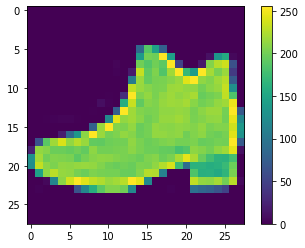

In [22]:
plt.imshow(train_images[15])
plt.colorbar()
plt.show()

In [0]:
# as we can see that the images pixels are in range 0 to 255, and thus we first need to convert them in range of 0 to 1

In [0]:
train_images=train_images/255.0
test_images=test_images/255.0


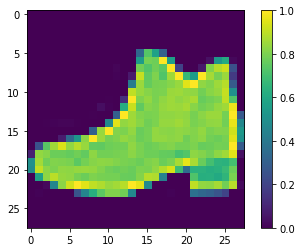

In [25]:
plt.imshow(train_images[15])
plt.colorbar()
plt.show()

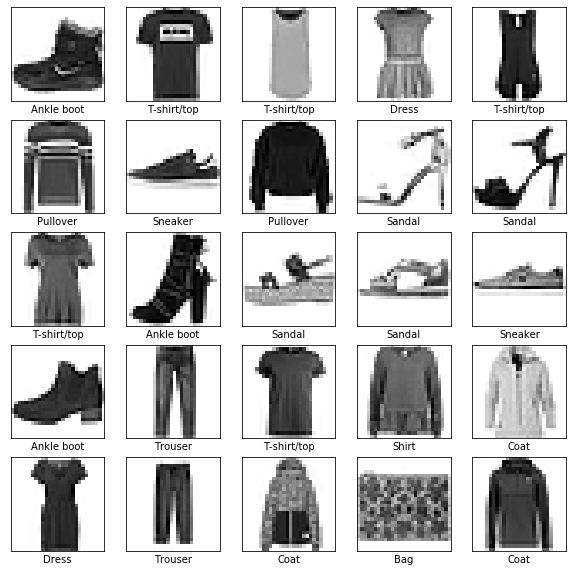

In [29]:
plt.figure(figsize=[10,10])
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),   # to flatten 2d layer into 1d # has no parameters to learn but reform the data
                        keras.layers.Dense(128,activation=tf.nn.relu),
                        keras.layers.Dense(64,activation=tf.nn.relu),  # Fully connected dense layer of 128 neurons
                        keras.layers.Dense(32,activation=tf.nn.relu), 
                        keras.layers.Dense(10,activation=tf.nn.softmax)   # This is the softmax layer , each node contain probability scores                  
])

In [0]:
# Compile the model

In [0]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [71]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.5109 - accuracy: 0.8180
Epoch 2/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3732 - accuracy: 0.8640
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3365 - accuracy: 0.8771
Epoch 4/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3170 - accuracy: 0.8827
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2999 - accuracy: 0.8893
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2839 - accuracy: 0.8945
Epoch 7/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2739 - accuracy: 0.8973
Epoch 8/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2636 - accuracy: 0.9014
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2533 - accuracy: 0.9046
Epoch 10/10
60

In [72]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("Test Accuracy",test_acc)

10000/10000 [==============================] - 1s 71us/sample - loss: 0.3402 - accuracy: 0.8846
Test Accuracy 0.8846


In [0]:
predictions=model.predict(test_images)

In [74]:
predictions[1]

array([9.2191249e-06, 5.5978711e-10, 9.9793112e-01, 8.7266862e-08,
       1.8593618e-03, 4.0154902e-16, 2.0006805e-04, 4.9957739e-17,
       1.6430572e-09, 5.3277661e-15], dtype=float32)

In [75]:
np.argmax(predictions[0])

9

In [76]:
test_labels[0]

9

In [77]:
np.argmax(predictions[100])

3

In [78]:
test_labels[100]

3

In [0]:
from sklearn.metrics import classification_report

In [0]:
pred=[]
for i in predictions:
  pred.append(np.argmax(i))

In [81]:
print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1000
           1       0.95      0.98      0.97      1000
           2       0.79      0.81      0.80      1000
           3       0.89      0.87      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.96      0.98      0.97      1000
           6       0.73      0.67      0.70      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

